In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp

In [2]:
df = pd.read_csv("_data")

In [3]:
df

,diameter,epconst,wavelength,intensity
0,20,1.0,506.82,137.31
1,30,1.0,506.82,482.06
2,40,1.0,506.82,1199.62
3,50,1.0,506.82,2496.40
4,60,1.2,512.44,4661.90
...,...,...,...,...
84,204,1.3,585.54,139323.78
85,209,1.3,585.54,143050.76
86,214,1.3,591.16,146639.03
87,221,1.3,596.78,150112.84


In [4]:
X = df.drop(['wavelength','intensity'],axis = 1)

In [5]:
X

,diameter,epconst
0,20,1.0
1,30,1.0
2,40,1.0
3,50,1.0
4,60,1.2
...,...,...
84,204,1.3
85,209,1.3
86,214,1.3
87,221,1.3


In [6]:
y = df['wavelength']

In [7]:
y

0     506.82
1     506.82
2     506.82
3     506.82
4     512.44
       ...  
84    585.54
85    585.54
86    591.16
87    596.78
88    602.40
Name: wavelength, Length: 89, dtype: float64

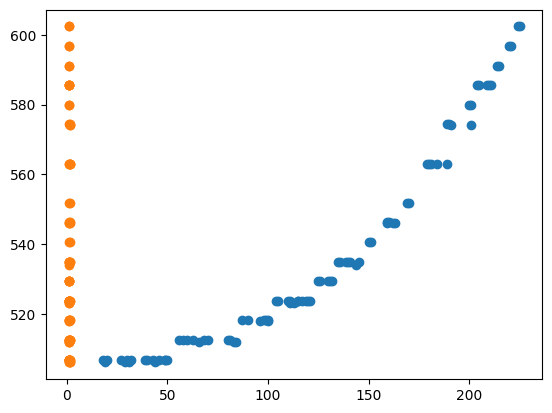

In [8]:
plt.plot(X,y,'o')

# TRAIN-TEST SPLIT 

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [10]:
X_train

,diameter,epconst
27,220,1.0
20,170,1.0
72,121,1.3
62,43,1.1
68,99,1.5
...,...,...
75,136,1.6
63,49,1.0
70,111,1.0
81,181,1.6


In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
mymodel = LinearRegression()

In [13]:
mymodel.fit(X_train,Y_train)

LinearRegression()

In [14]:
test_prediction= mymodel.predict(X_test)

In [15]:
Y_test

37    506.83
26    591.16
58    563.05
43    563.00
82    574.29
73    529.31
6     512.44
80    551.80
56    512.44
16    534.93
3     506.82
1     506.82
32    512.00
25    585.54
45    574.00
79    546.18
21    563.05
2     506.82
13    529.31
48    523.70
84    585.54
50    518.00
14    529.31
23    579.91
31    518.07
22    574.29
69    523.69
Name: wavelength, dtype: float64

In [16]:
from sklearn.metrics import mean_squared_error

In [17]:
mse = mean_squared_error(Y_test,test_prediction)

In [18]:
mse

60.33016401206395

In [19]:
rmse = np.sqrt(mse)

In [20]:
rmse

7.767249449584065

In [21]:
test_prediction

array([501.78704901, 577.5901674 , 561.82314092, 562.80923483,
       565.027625  , 537.69205705, 517.89901567, 556.15406434,
       510.35648911, 543.90354951, 504.58867469, 495.71511403,
       511.4821405 , 575.37177723, 565.91498106, 551.71728401,
       562.26681896, 500.15189436, 537.86452715, 534.38092812,
       572.29894362, 525.95104549, 539.8775346 , 570.72961419,
       525.88522026, 566.70359928, 527.52037491])

In [22]:
residual = Y_test - test_prediction

In [23]:
residual

37     5.042951
26    13.569833
58     1.226859
43     0.190765
82     9.262375
73    -8.382057
6     -5.459016
80    -4.354064
56     2.083511
16    -8.973550
3      2.231325
1     11.104886
32     0.517859
25    10.168223
45     8.085019
79    -5.537284
21     0.783181
2      6.668106
13    -8.554527
48   -10.680928
84    13.241056
50    -7.951045
14   -10.567535
23     9.180386
31    -7.815220
22     7.586401
69    -3.830375
Name: wavelength, dtype: float64

<Axes: xlabel='wavelength', ylabel='Density'>

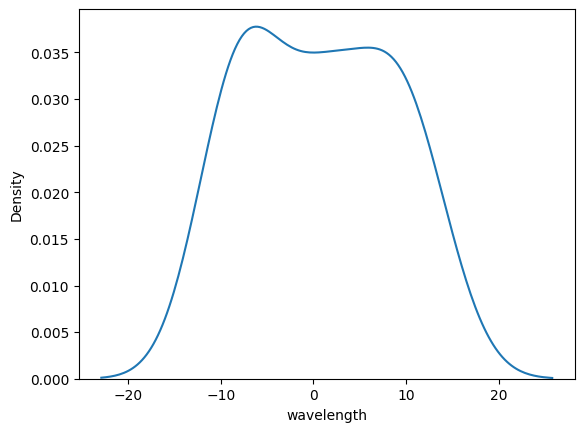

In [24]:
sns.kdeplot(residual)

# LINEAR REGRESSION PART

In [25]:
LinearRegression_project_model = LinearRegression()

In [26]:
LinearRegression_project_model.fit(X,y)

LinearRegression()

In [27]:
from joblib import dump,load

In [28]:
dump(LinearRegression_project_model,'LinearRegression_project_model.joblib')

['LinearRegression_project_model.joblib']

In [29]:
loaded_model = load('LinearRegression_project_model.joblib')

In [30]:
assumption = [[20,1.2]]


In [31]:
loaded_model.predict(assumption)

C:\Users\abhis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([489.86922902])

# POLYNOMIAL REGRESSION PART

In [32]:
from sklearn.preprocessing import PolynomialFeatures

In [33]:
converter = PolynomialFeatures(degree=2, include_bias=False)

In [34]:
converter.fit(X)

PolynomialFeatures(include_bias=False)

In [35]:
poly = converter.transform(X)

In [36]:
poly

array([[2.0000e+01, 1.0000e+00, 4.0000e+02, 2.0000e+01, 1.0000e+00],
       [3.0000e+01, 1.0000e+00, 9.0000e+02, 3.0000e+01, 1.0000e+00],
       [4.0000e+01, 1.0000e+00, 1.6000e+03, 4.0000e+01, 1.0000e+00],
       [5.0000e+01, 1.0000e+00, 2.5000e+03, 5.0000e+01, 1.0000e+00],
       [6.0000e+01, 1.2000e+00, 3.6000e+03, 7.2000e+01, 1.4400e+00],
       [7.0000e+01, 1.0000e+00, 4.9000e+03, 7.0000e+01, 1.0000e+00],
       [8.0000e+01, 1.0000e+00, 6.4000e+03, 8.0000e+01, 1.0000e+00],
       [9.0000e+01, 1.0000e+00, 8.1000e+03, 9.0000e+01, 1.0000e+00],
       [1.0000e+02, 1.0000e+00, 1.0000e+04, 1.0000e+02, 1.0000e+00],
       [1.0500e+02, 1.0000e+00, 1.1025e+04, 1.0500e+02, 1.0000e+00],
       [1.1000e+02, 1.0000e+00, 1.2100e+04, 1.1000e+02, 1.0000e+00],
       [1.1500e+02, 1.0000e+00, 1.3225e+04, 1.1500e+02, 1.0000e+00],
       [1.2000e+02, 1.0000e+00, 1.4400e+04, 1.2000e+02, 1.0000e+00],
       [1.2500e+02, 1.0000e+00, 1.5625e+04, 1.2500e+02, 1.0000e+00],
       [1.3000e+02, 1.1000e+00, 1.

In [37]:
poly.shape

(89, 5)

In [38]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.3, random_state=101)

In [39]:
new_model = LinearRegression()

In [40]:
new_model.fit(X_train,Y_train)

LinearRegression()

In [41]:
new_prediction = new_model.predict(X_test)

In [42]:
new_prediction

array([501.78704901, 577.5901674 , 561.82314092, 562.80923483,
       565.027625  , 537.69205705, 517.89901567, 556.15406434,
       510.35648911, 543.90354951, 504.58867469, 495.71511403,
       511.4821405 , 575.37177723, 565.91498106, 551.71728401,
       562.26681896, 500.15189436, 537.86452715, 534.38092812,
       572.29894362, 525.95104549, 539.8775346 , 570.72961419,
       525.88522026, 566.70359928, 527.52037491])

In [43]:
new_mse = mean_squared_error(Y_test, new_prediction)

In [44]:
new_mse

60.33016401206395

In [45]:
new_rmse = np.sqrt(new_mse)

In [46]:
new_rmse

7.767249449584065

In [47]:
final_polynomial = LinearRegression()

In [48]:
final_polynomial.fit(poly,y) 

LinearRegression()

In [49]:
from joblib import dump, load

In [50]:
dump(final_polynomial,'final_polynomial_model.joblib')

['final_polynomial_model.joblib']

In [51]:
loaded_model = load('final_polynomial_model.joblib')

In [52]:
dump(converter,'converter.joblib')

['converter.joblib']

In [53]:
from joblib import load


In [54]:
loaded_converter = load('converter.joblib')

In [55]:
predict = [[20,1.2]]

In [56]:
transformed = loaded_converter.fit_transform(predict)

In [57]:
transformed

array([[ 20.  ,   1.2 , 400.  ,  24.  ,   1.44]])

In [58]:
loaded_model.predict(transformed)

array([508.18471886])

# Random Forest

<Axes: xlabel='diameter', ylabel='wavelength'>

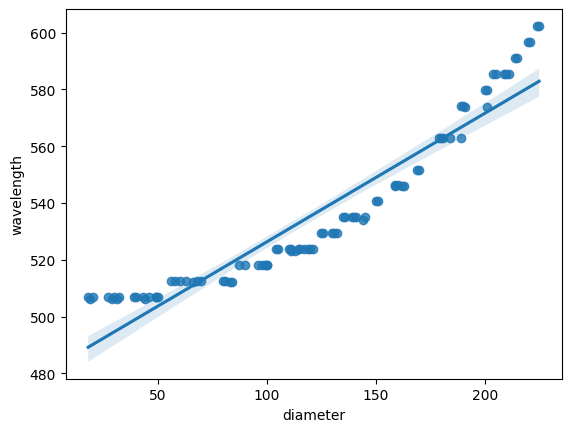

In [59]:
sns.regplot(data = df , x = 'diameter', y = 'wavelength')

<Axes: xlabel='wavelength', ylabel='diameter'>

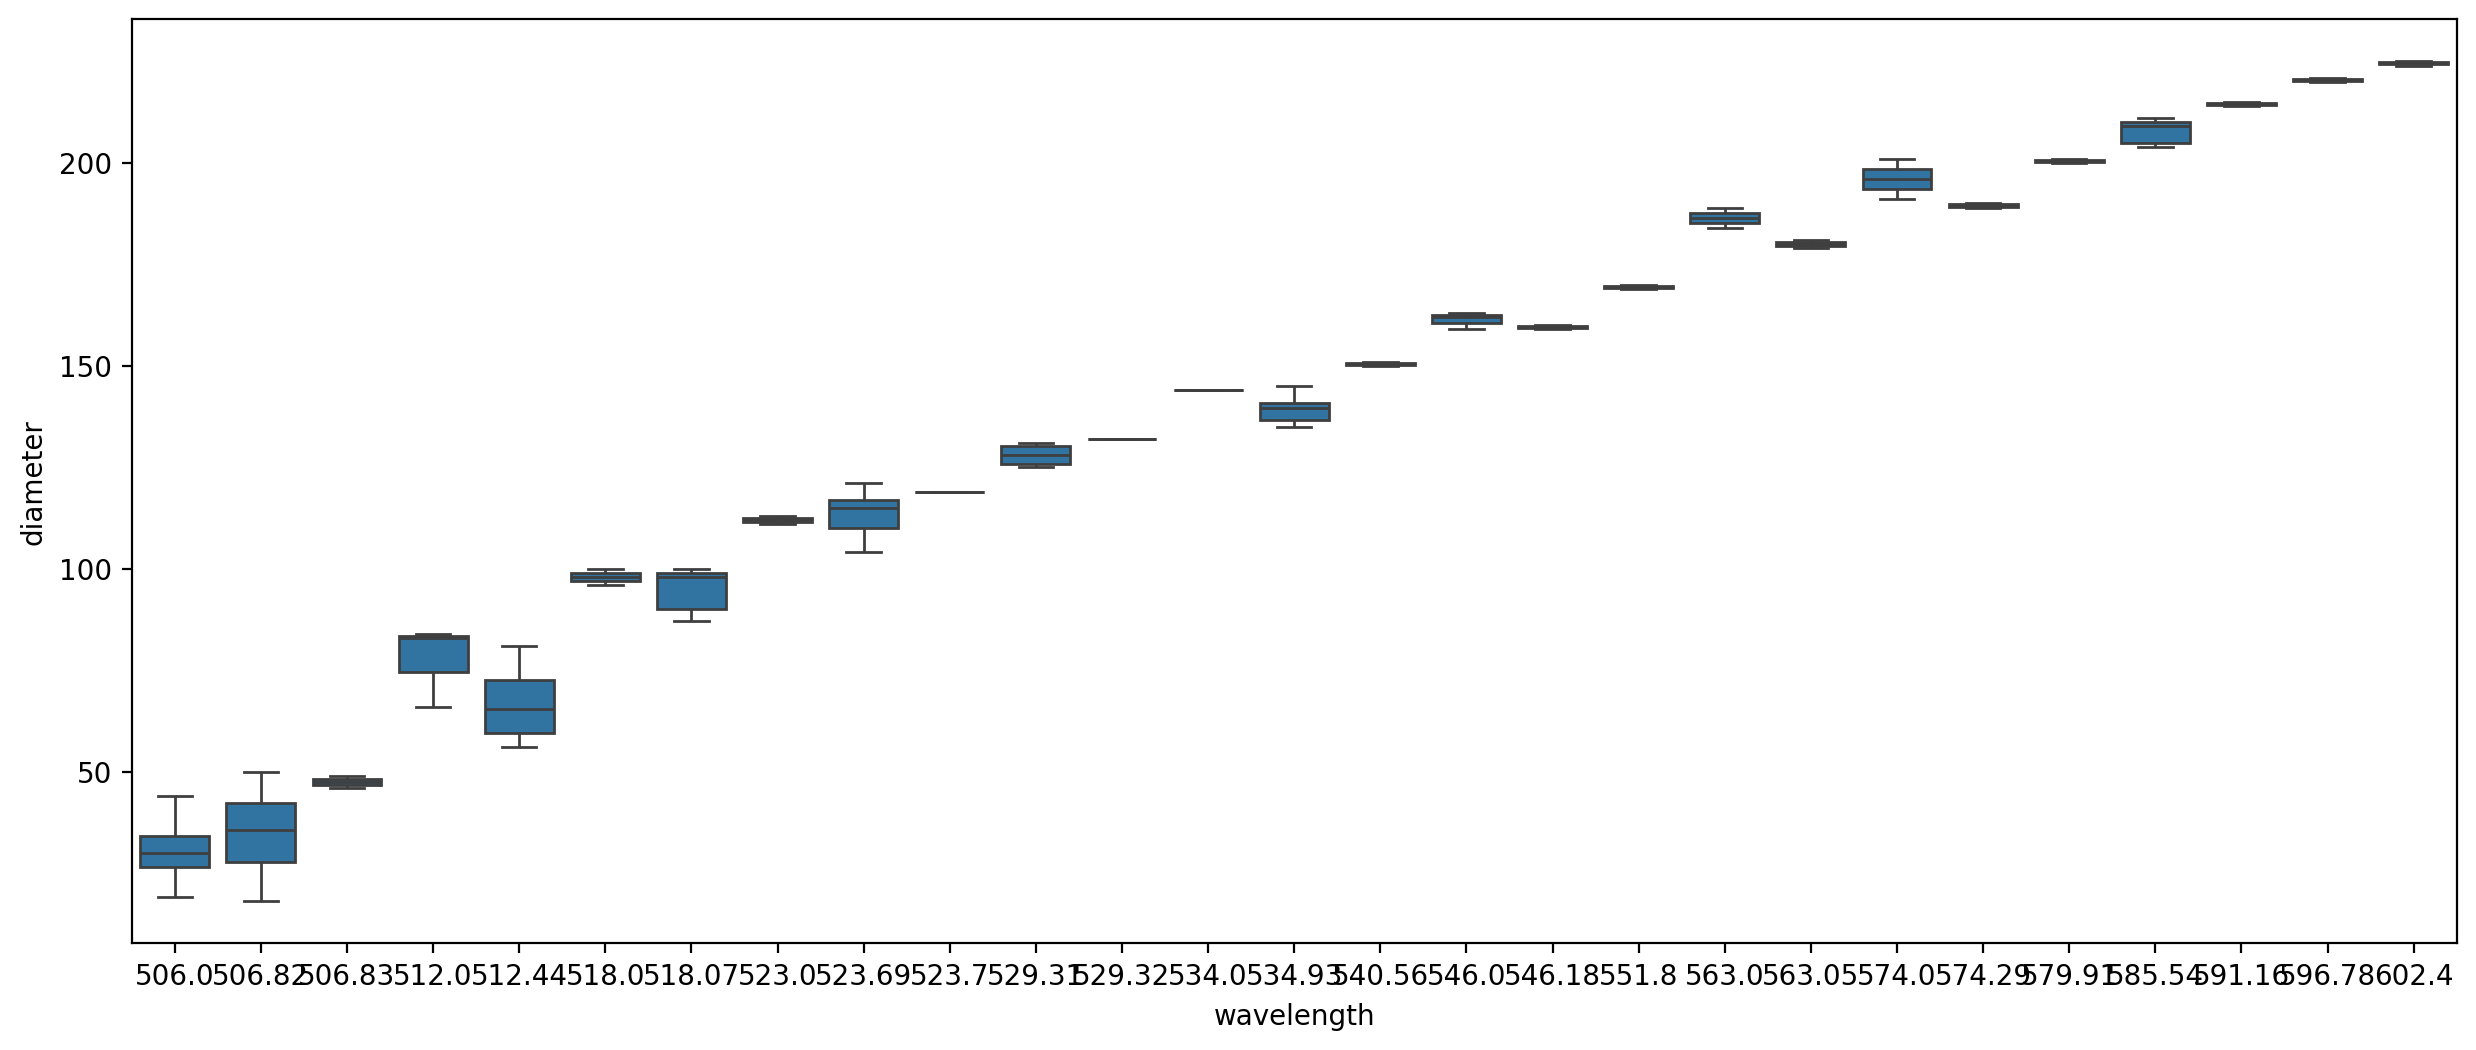

In [60]:
plt.figure(figsize= (15,6),dpi = 200)
sns.boxplot(data = df, y = 'diameter', x = 'wavelength')

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [62]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=101)

In [63]:
fc = RandomForestRegressor(n_estimators=120,
                           max_features='sqrt',
                           random_state=42)

In [64]:
fc.fit(X_train,y_train)

RandomForestRegressor(max_features='sqrt', n_estimators=120, random_state=42)

In [65]:
pred = fc.predict(X_test)

In [66]:
pred

array([507.7375    , 585.95825   , 559.10991667, 563.67541667,
       563.6575    , 528.429     , 512.89366667, 546.3505    ,
       512.20591667, 532.13408333, 508.40558333, 506.76533333,
       512.55675   , 584.36333333, 563.6575    , 542.04091667,
       559.10991667, 506.9       , 524.66808333, 529.1085    ,
       583.84841667, 521.95508333, 529.10658333, 573.33033333,
       518.76291667, 564.11691667, 520.57533333, 576.67991667,
       544.33916667, 524.18916667])

In [67]:
fc_mse = mean_squared_error(y_test, pred)

In [68]:
fc_mse

34.18470106388688

In [69]:
rmse = np.sqrt(fc_mse)

In [70]:
rmse

5.846768429131333